#### Load the dataset and take a quick look at the data structure

In [23]:
import pandas as pd 
import numpy as np

In [24]:
housing = pd.read_csv('datahub/cal_housing.csv')

In [25]:
#Selects the top five rows using the DataFrame’s head() method:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
#The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
#Finds the count of districts that belong to each category|| value_counts() methods
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [28]:
#Let’s look at the other fields. The describe() method shows a summary of the numerical attributes:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


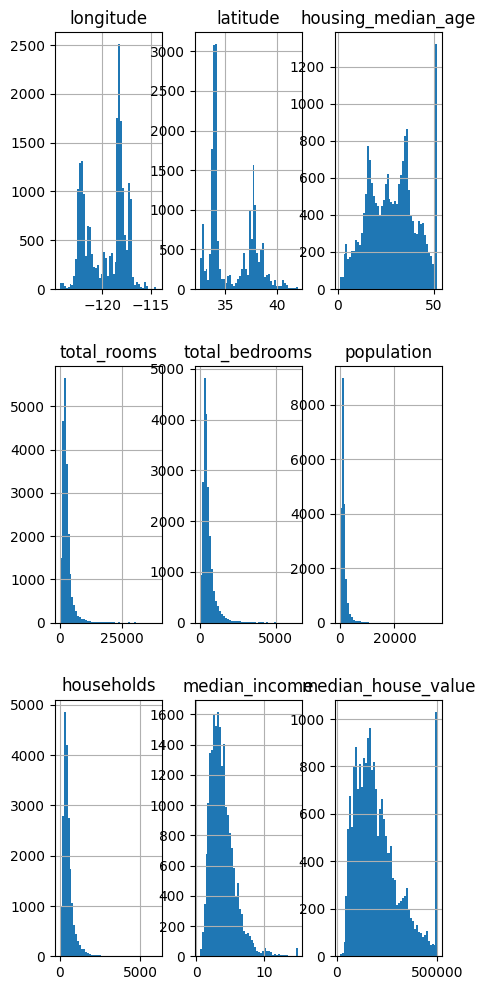

In [29]:
#a percentile indicates the value below which a given percentage of observations in a group of observations falls.
import matplotlib.pyplot as plt 

housing.hist(bins=50, figsize=(5,12))
plt.show()

##### Explore and visualize the data to gain insights

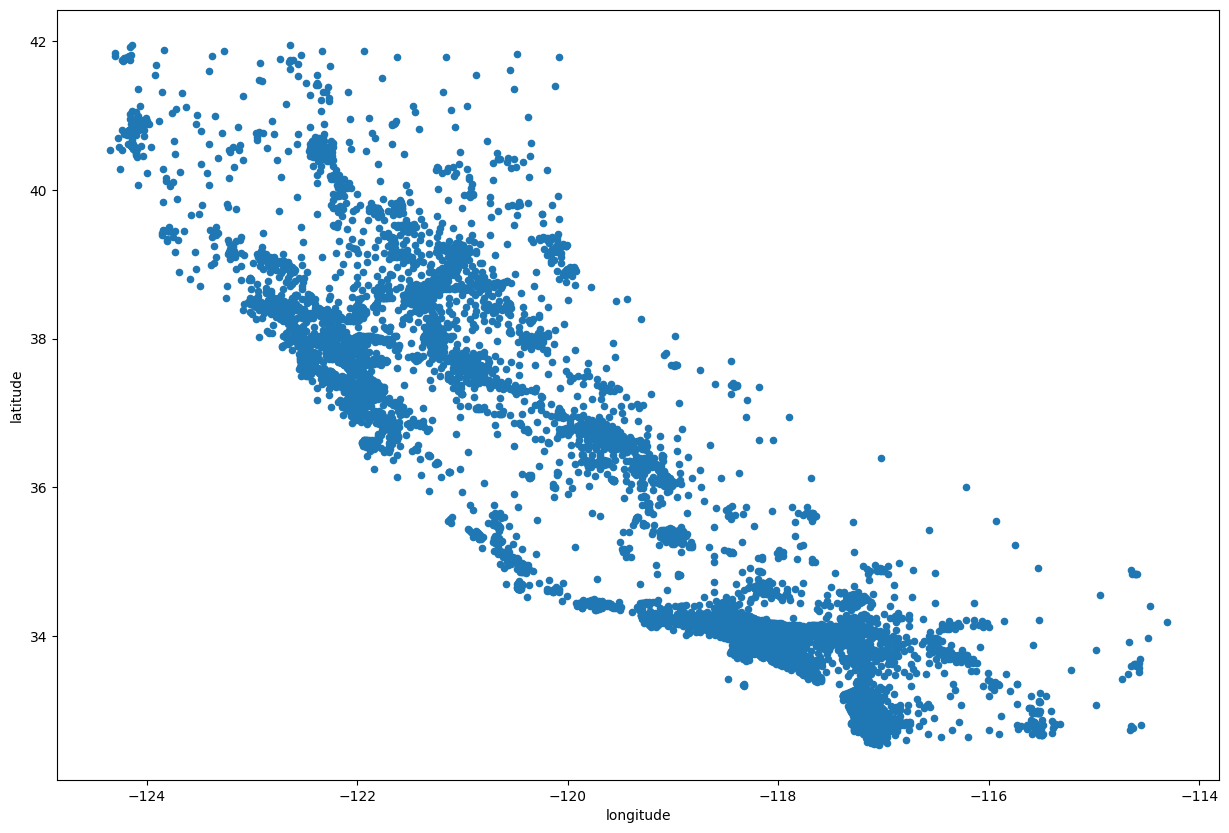

In [30]:
housing.plot(kind="scatter", x="longitude",y="latitude", figsize=(15,10));

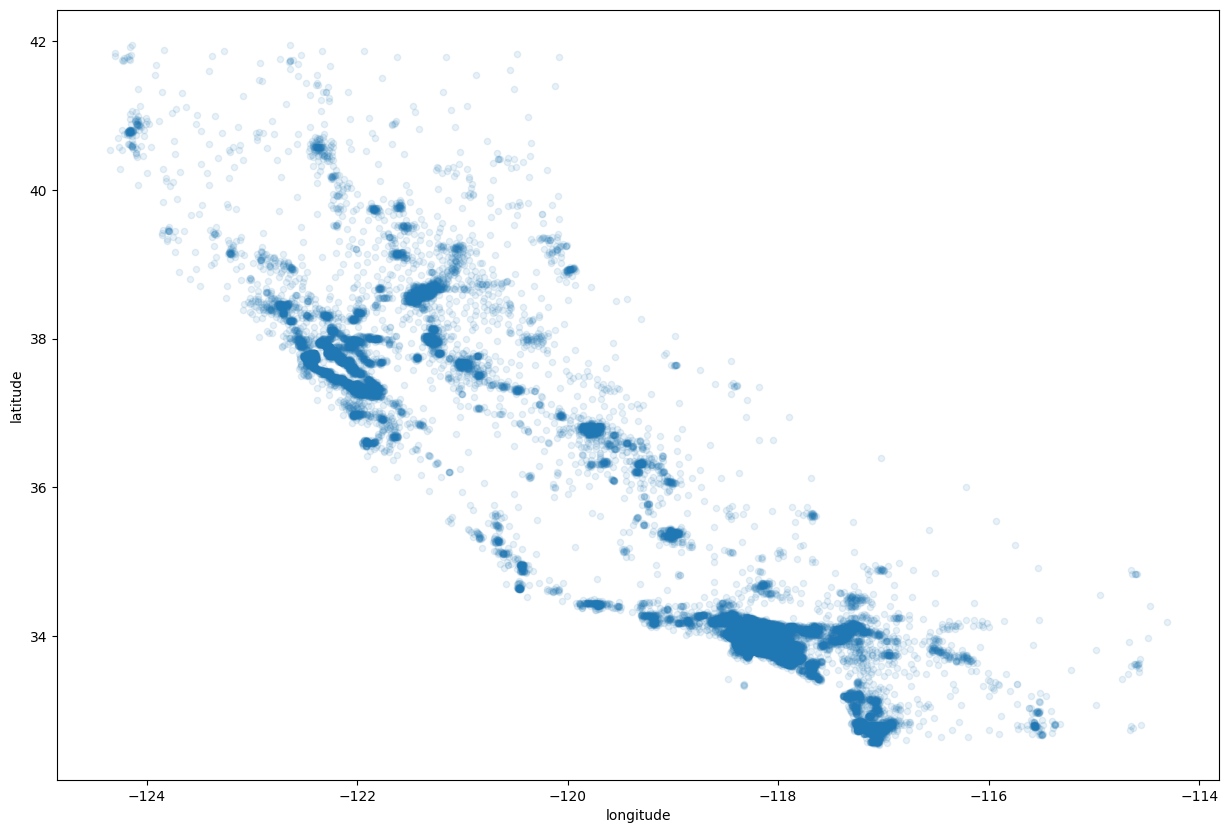

In [31]:
#Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points:
housing.plot(kind="scatter",x="longitude",y="latitude", alpha = 0.1, figsize=(15,10));

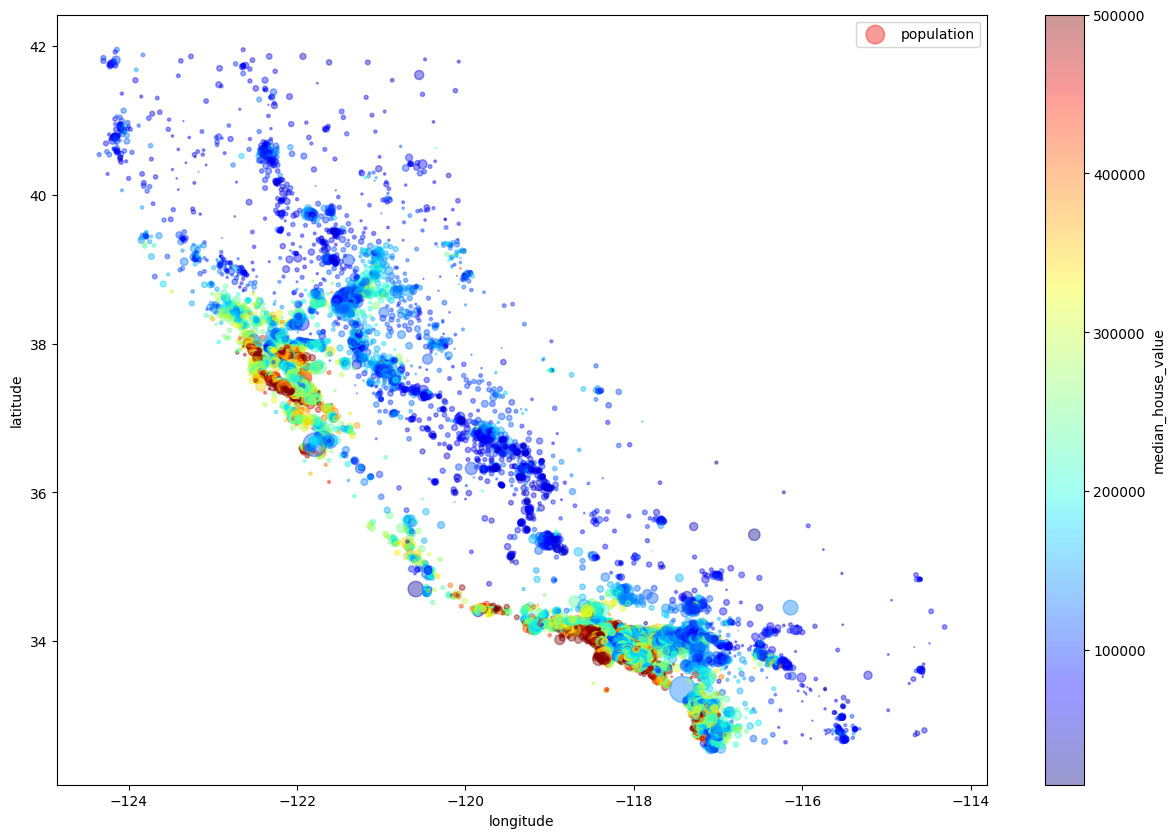

In [32]:
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",figsize=(15,10),
c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend();


In [33]:
#Looking for correlations 
corr_matrix=housing.corr()

C:\Users\otchi\AppData\Local\Temp\ipykernel_19184\4226729754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


In [35]:
#Now let’s look at how much each attribute correlates with the median house value:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

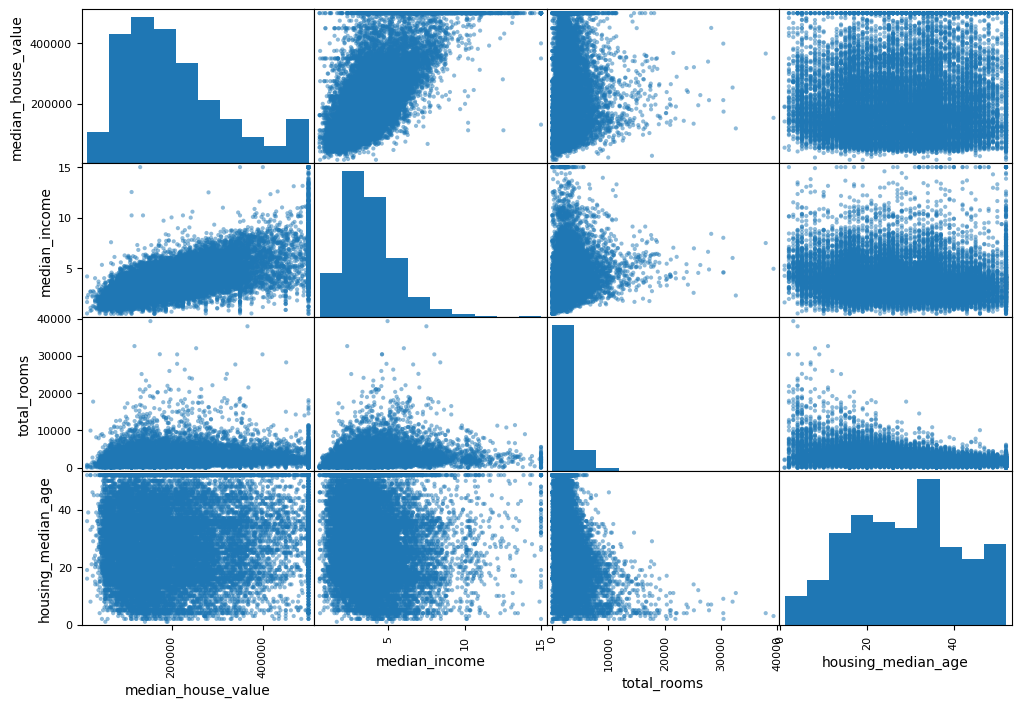

In [38]:
from pandas.plotting import scatter_matrix 
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8));

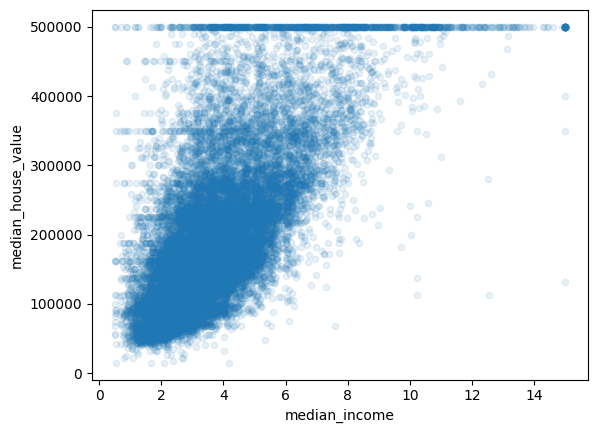

In [42]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
figsize=(15,10)
